In [1]:
# Beginning of "eda.ipynb"

# Exploratory Data Analysis

The following is the data analysis done after the first part of the project which was to create synthetic data that represents a transportation problem. Want to explore the results of said dataset.

In [9]:
# Import necessary libraries and modules
import yaml # Read config files
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 10)

from helper_funcs import read_tbl

## Section 1: Query Data from Database
### Establish a database connection using SQLAlchemy

Have the logic in a new helper function script that will be included in the project.

In [149]:
df = read_tbl()

Table successfully read from PostgreSQL!
Read time: 0.187 seconds


In [ ]:
# To see the demand
df.tail(15)
# To see production capacity
# df.head(15)

,index,customer_1,customer_2,customer_3,customer_4,...,customer_122,customer_123,customer_124,customer_125,production_capacity
61,factory_62,9,3,11,11,...,8,13,4,5,625.0
62,factory_63,1,10,5,1,...,12,12,4,11,375.0
63,factory_64,14,14,8,6,...,4,3,13,5,750.0
64,factory_65,7,13,15,6,...,6,10,6,1,750.0
65,factory_66,5,3,7,9,...,8,2,12,13,750.0
...,...,...,...,...,...,...,...,...,...,...,...
71,factory_72,10,14,11,4,...,12,4,12,5,250.0
72,factory_73,13,9,6,2,...,12,13,15,5,500.0
73,factory_74,12,4,3,9,...,5,14,10,7,750.0
74,factory_75,8,6,15,6,...,13,11,6,13,125.0


Want a subset that removes the final row and column which is the demand and production capacity, respectively.

In [13]:
trans_costs = df.iloc[:-1, 1:-1]
trans_costs.head(15)

,customer_1,customer_2,customer_3,customer_4,customer_5,...,customer_121,customer_122,customer_123,customer_124,customer_125
0,3,6,5,2,3,...,15,9,3,14,14
1,7,14,3,9,11,...,8,5,8,9,11
2,8,15,12,3,1,...,4,4,14,15,11
3,4,10,1,12,13,...,10,1,10,9,10
4,4,15,5,9,1,...,12,8,11,1,7
...,...,...,...,...,...,...,...,...,...,...,...
10,11,15,7,3,14,...,6,5,9,9,12
11,3,4,10,2,7,...,11,6,8,5,13
12,8,15,15,2,1,...,3,1,2,9,15
13,4,15,6,14,6,...,4,1,1,5,7


## Section 2: Metrics for the Dashboard
Want to gather the number of customers and number of factories.

In [14]:
num_of_plants = len(trans_costs.index)
print(f"The number of factories: {num_of_plants}")

The number of factories: 75


In [15]:
# Get the number of plants
num_of_customers = len(trans_costs.columns)
print(f"The number of customers: {num_of_customers}")

The number of customers: 125


Wanted a random subset of 15 customers to perform some analysis.

In [16]:
# Randomly select 15 columns
n_cols = 15
df2 = trans_costs.sample(
    n = n_cols,
    axis = 1
)
df2

,customer_118,customer_22,customer_67,customer_75,customer_84,...,customer_109,customer_6,customer_20,customer_112,customer_63
0,9,9,9,12,5,...,7,10,5,15,2
1,2,7,14,2,11,...,12,14,12,2,7
2,7,8,14,1,14,...,4,11,9,11,4
3,7,15,1,4,9,...,8,7,8,4,7
4,8,11,7,1,11,...,11,5,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...
70,12,7,8,13,7,...,6,5,15,14,9
71,14,12,4,1,14,...,3,9,10,1,9
72,9,5,12,12,5,...,12,1,3,14,4
73,3,9,7,6,13,...,9,1,7,2,14


## Section 3: Plotting EDA

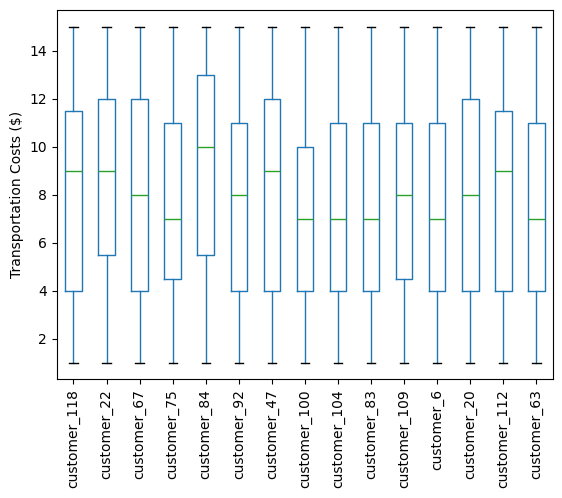

In [17]:
import matplotlib.pyplot as plt
df2.boxplot()
ax = plt.subplot()
ax.set_ylabel("Transportation Costs ($)")
# Hide grid lines
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

Now, want to recreate the same plot using the `plotnine` library. Will be using this library for the dashboard I am creating.

In [143]:
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    scale_x_discrete,
    labs,
    coord_flip,
    geom_histogram,
    theme,
    element_text
)

Melt the second data frame to get customers as values and their transportation cost as the other column. Easier for plotting in ggplot with Python

In [45]:
df3 = df2.melt()
df3

,variable,value
0,customer_118,9
1,customer_118,2
2,customer_118,7
3,customer_118,7
4,customer_118,8
...,...,...
1120,customer_63,9
1121,customer_63,9
1122,customer_63,4
1123,customer_63,14


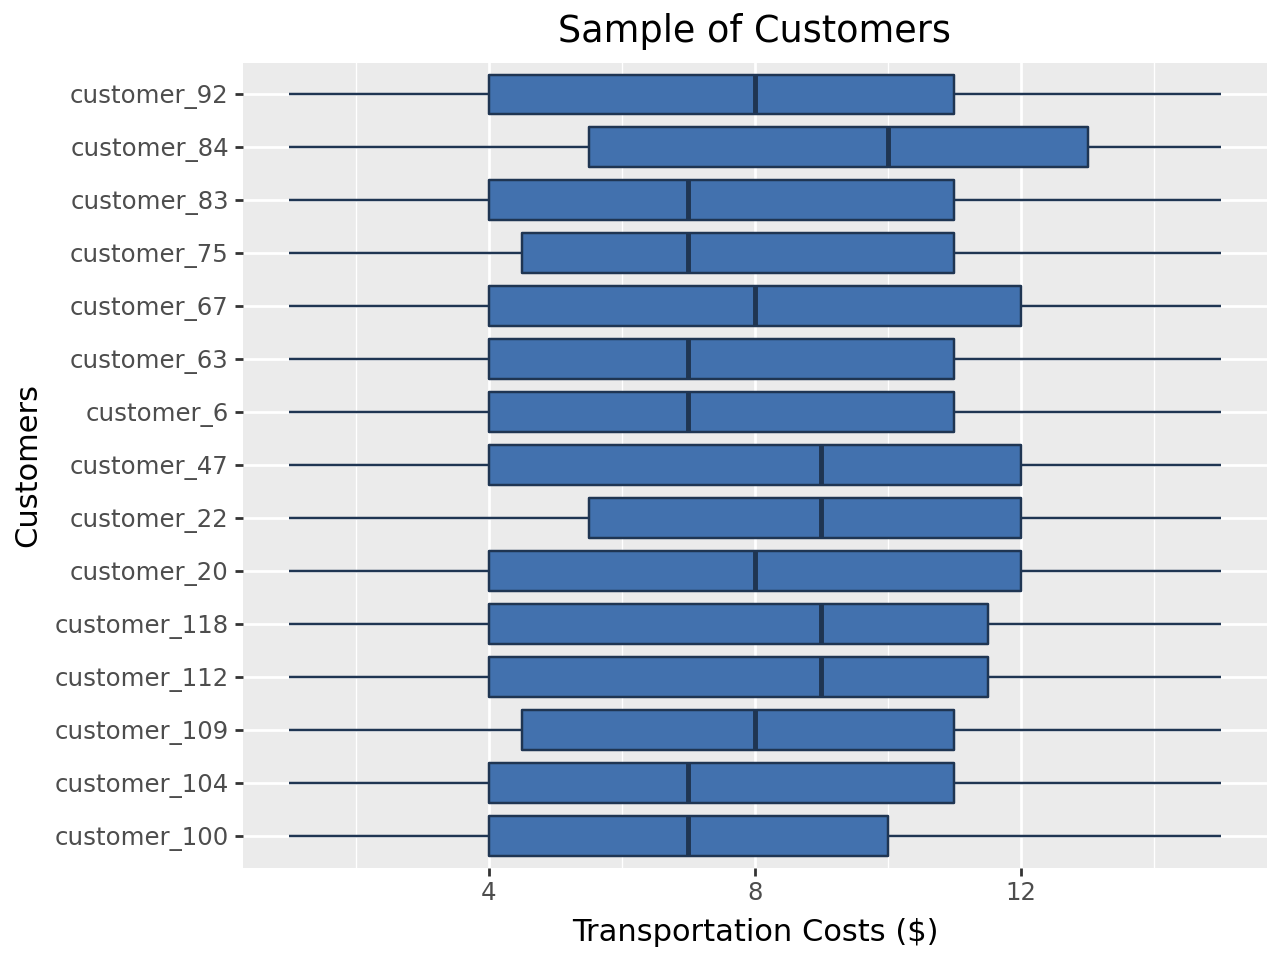

In [ ]:
# Plotting Logic
(
    ggplot(df3)
    + aes(
        x="variable",
        y="value"
        ) 
    + scale_x_discrete(
        name="Customers"
        )
    + labs(
        title="Sample of Customers",
        y="Transportation Costs ($)"
        )
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE"
        )
    + coord_flip()
)

In [25]:
df2.head()

,customer_118,customer_22,customer_67,customer_75,customer_84,...,customer_109,customer_6,customer_20,customer_112,customer_63
0,9,9,9,12,5,...,7,10,5,15,2
1,2,7,14,2,11,...,12,14,12,2,7
2,7,8,14,1,14,...,4,11,9,11,4
3,7,15,1,4,9,...,8,7,8,4,7
4,8,11,7,1,11,...,11,5,1,3,6


In [65]:
trans_costs.mean()

customer_1      7.773333
customer_2      8.920000
customer_3      7.960000
customer_4      7.773333
customer_5      7.440000
                  ...   
customer_121    7.773333
customer_122    7.413333
customer_123    7.893333
customer_124    8.066667
customer_125    8.240000
Length: 125, dtype: float64

Will extract the demand and production capacity as Pandas Dataframe to get an instagram.

In [128]:
# Extract the demand row into its own Pandas Series
# demand = df.iloc[:,-1]
demand = df.iloc[-1,:]
type(demand)

pandas.core.series.Series

In [129]:
# Convert from series to dataframe
demand = demand.to_frame(name = 'demand')
demand

,demand
index,demand
customer_1,240
customer_2,70
customer_3,110
customer_4,60
...,...
customer_122,140
customer_123,300
customer_124,90
customer_125,90


In [131]:
# Drop NAs from the dataframe
demand = demand.dropna()
# demand.drop(demand.iloc[0], axis=0)
demand

,demand
index,demand
customer_1,240
customer_2,70
customer_3,110
customer_4,60
...,...
customer_121,300
customer_122,140
customer_123,300
customer_124,90


In [132]:
demand = demand.iloc[1:, :]

In [136]:
demand

,demand
customer_1,240
customer_2,70
customer_3,110
customer_4,60
customer_5,180
...,...
customer_121,300
customer_122,140
customer_123,300
customer_124,90


Going to comment-out the following blocks/cells of code. Some of the logic applied to the demand as a Series, that is, before converting it to a Dataframe. And second cell has plotting logic but only for `matplotlib` and didn't feel an urgency to update it because we're working with ggplot (plotnine) now.

In [137]:
# Resetting the index
# demand = demand.reset_index()
# demand = demand.iloc[:,-1]
# demand.columns = demand.iloc[0]
# print(demand.shape)
# print(demand)

Now, want to create a histogram from the Pandas Series.

In [138]:
# # For density histogram
# # demand.plot(kind='hist', density=True)
# demand.plot(kind='hist', color = 'green', edgecolor='black', bins=10)
# plt.show()

Create the same histogram but using ggplot.

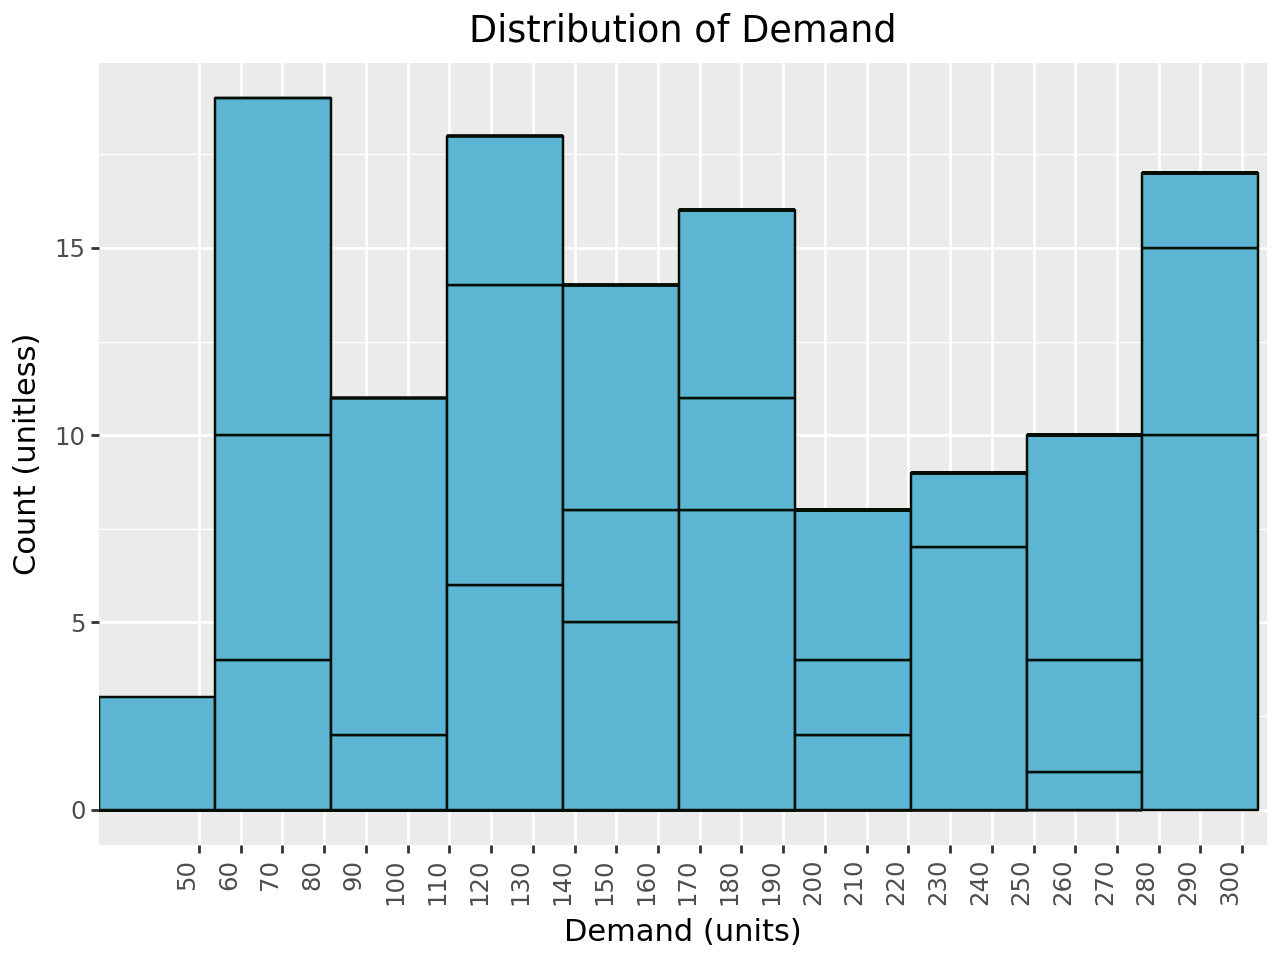

In [147]:
# Plotting Logic
(
    ggplot(
        demand
        )
    + aes(
        x='demand'
        )
    + geom_histogram(
        bins=10,
        fill='#5cb5d3',
        color='#040e05'
        )
    + labs(
        title="Distribution of Demand",
        x="Demand (units)",
        y="Count (unitless)"
        )
    + theme(
        axis_text_x=element_text(
            rotation=90,
            hjust=1
            )
        )
)

In [154]:
# Pull the last column which is the production capacity
prod_cap = df.iloc[:,-1]
# Remove NA's
prod_cap = prod_cap.dropna()
# Turn data type from float to integer
prod_cap = prod_cap.astype(int)
# Convert from series to dataframe
prod_cap = prod_cap.to_frame(name = 'production_capacity')
print(prod_cap)

    production_capacity
0                   625
1                   250
2                   375
3                   625
4                   125
..                  ...
70                  375
71                  500
72                  125
73                  750
74                  500

[75 rows x 1 columns]


In [155]:
type(prod_cap)

pandas.core.frame.DataFrame

The following is a plot using `matplotlib`. Will use ggplot after.

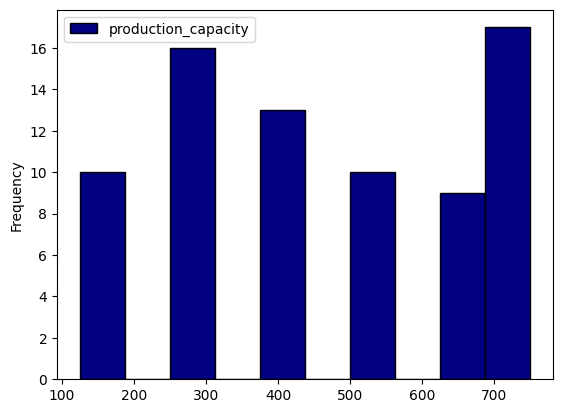

In [156]:
# Histogram plot
prod_cap.plot(kind='hist', color = 'navy', edgecolor='black', bins=10)
plt.show()

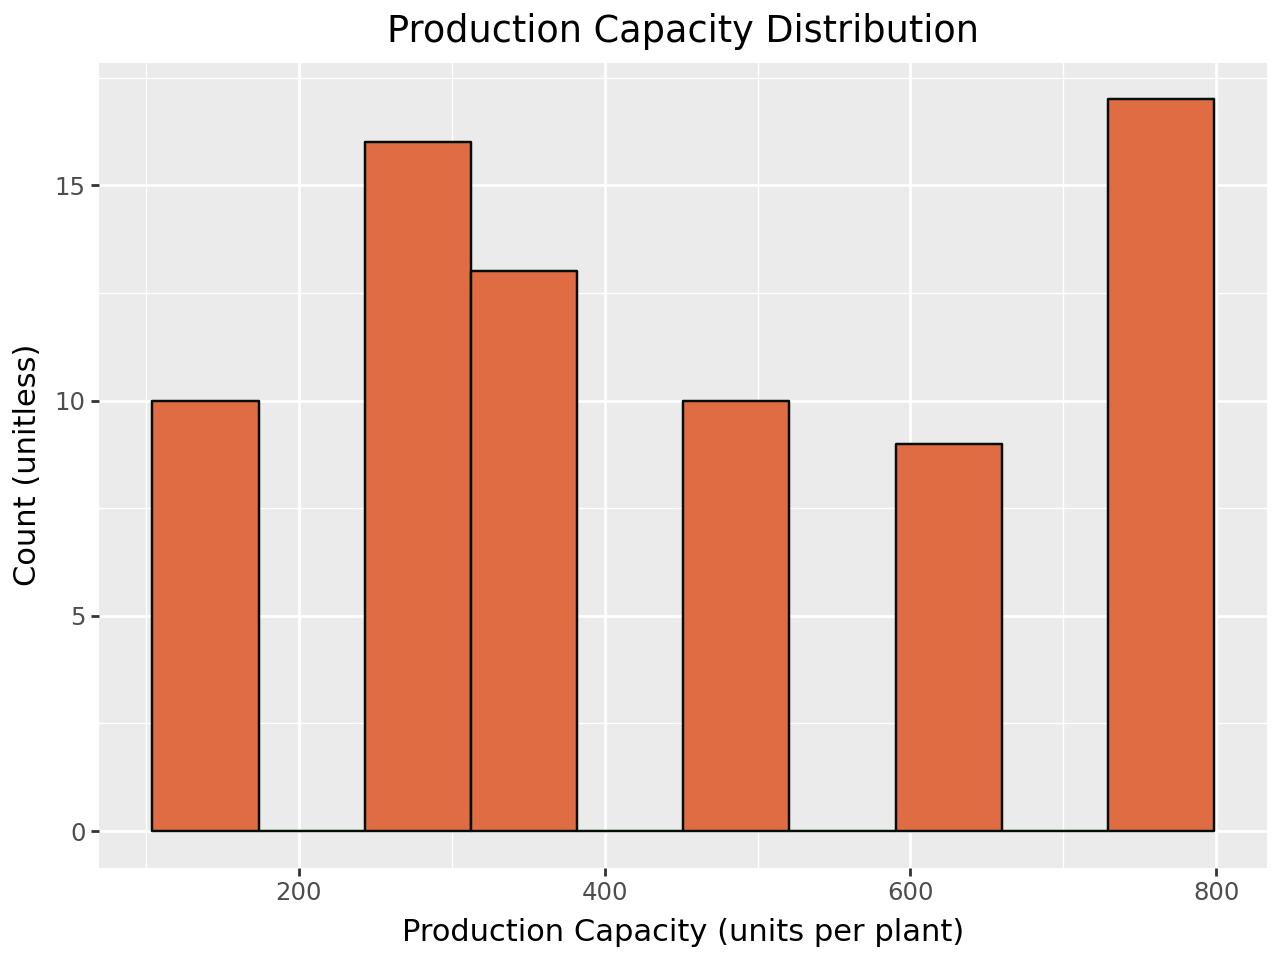

In [158]:
# Plotting Logic
(
    ggplot(
        prod_cap
        )
    + aes(
        x='production_capacity'
        )
    + geom_histogram(
        bins=10,
        fill='#e06c43',
        color='#040e05'
        )
    + labs(
        title="Production Capacity Distribution",
        x="Production Capacity (units per plant)",
        y="Count (unitless)"
        )
)

## Conclusion

So was able to determine some metrics and plots including boxplots and histograms to give an initial view of the synthetic data for the transportation problem.

In [ ]:
# End of "eda.ipynb"